In [14]:
from util import get_data, plot_data
import datetime as dt 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
from marketsimcode import compute_portvals

In [9]:
sv = 100000
sd = dt.datetime(2008, 1, 1)
ed = dt.datetime(2009,12,31)
symbol ='JPM'

In [10]:
df_price = get_data([symbol], pd.date_range(sd, ed))
df_price = df_price[[symbol]]

In [16]:
df_price.head()

,JPM,Cash
2008-01-02,38.47,1.0
2008-01-03,38.20,1.0
2008-01-04,37.33,1.0
2008-01-07,37.71,1.0
2008-01-08,36.21,1.0


In [1]:
from TheoreticallyOptimalStrategy import tos_trade,benchmark_trade

In [80]:
df_trade_tos = tos_trade(symbol="JPM", sd=dt.datetime(2008, 1, 1), ed=dt.datetime(2009,12,31), sv = 100000)
df_trade_bm = benchmark_trade(symbol="JPM", sd=dt.datetime(2008, 1, 1), ed=dt.datetime(2009,12,31), sv = 100000)

In [81]:
df_trade = df_trade_bm

In [83]:
df_trade["Cash"] = -df_trade["JPM"] * df_price["JPM"]

In [85]:
df_trade["Cash"] = df_trade["Cash"].cumsum() + 100000

In [87]:
df_trade['JPM'] = df_trade['JPM'].cumsum()

In [90]:
df_holding = df_trade * df_price

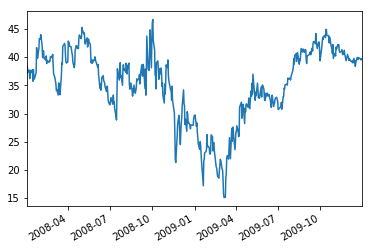

In [93]:
df_price['JPM'].plot()

In [99]:
portvals = df_holding.sum(axis=1)/100000 

In [ ]:
curr_cash = sv
for i in range(df_trade.shape[0]): 
    cash_series = (df_trade.iloc[i][0] * df_price.iloc[i][0])

In [40]:
df_holding = df_trade * df_price

In [71]:
from marketsimcode import compute_portvals

In [ ]:
compute_portvals(df_trade_tos, df_price)

In [105]:
compute_portvals(df_trade_tos, df_price)[0]

100000.0

In [68]:
df_holding = df_price * df_trade

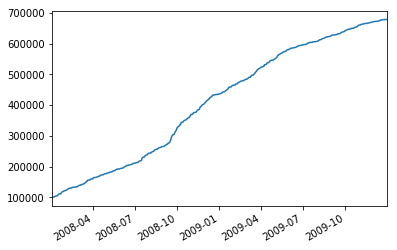

In [70]:
df_holding.sum(axis=1).plot()

In [12]:
df_price = get_data([symbol], pd.date_range(sd, ed))
df_price = df_price[[symbol]]
df_trade = pd.DataFrame().reindex_like(df_price).fillna(0)

In [ ]:
def benchmark(sd, ed, sv): 
    df_trade = get_data(['SPY'], pd.date_range(sd, ed))
    df_trade[:] = 0 
    df_trade.iloc[0] = 1000
    portvals = compute_portvals(df_trade, sv, commission=0.0, impact=0.0)
    return portvals 

In [ ]:
def stats(benchmark, theoritical): 
    benchmark, theoritical = benchmark['value'], theoritical['value']

    cr_b, dr_b, sddr_b, adr_b = cal_stats(benchmark)
    cr_t, dr_t, sddr_t, adr_t = cal_stats(theoritical)


In [75]:
def cal_stats(portvals): 
    cr = portvals[-1]/portvals[0] - 1 
    dr = (portvals / portvals.shift(1) - 1).iloc[1:]
    sddr = dr.std()
    adr = dr.mean()
    return cr, dr, sddr, adr

In [76]:
def ema(sd, ed, symbol, plot=False, window = 20): 
    delta = dt.timedelta(window * 2)
    extended_sd = sd - delta

    df_price = get_data([symbol], pd.date_range(extended_sd, ed))
    df_price = df_price[[symbol]] 
    df_price = df_price.ffill().bfill()

    df_ema = df_price.ewm(span=window, adjust=False).mean()

    df_ema = df_ema.truncate(before=sd)
    df_price= df_price.truncate(before=sd) 

    normalized_df_price = df_price[symbol]/df_price[symbol][0]
    normalized_df_ema = df_ema[symbol]/df_ema[symbol][0]

    if plot: 
        plt.figure(figsize=(14,8))

        plt.title("{} days EMA".format(window))
        plt.xlabel("Date")
        plt.ylabel("Normalized Price")
        plt.xticks(rotation=30)
        plt.grid()
        plt.plot(normalized_df_price, label="normalized price", color="blue")
        plt.plot(normalized_df_ema, label="{} days EMA".format(window), color="red")
        plt.legend()
        plt.savefig("1_ema.png")
        plt.clf()

    return normalized_df_ema


In [ ]:
def macd(sd, ed, symbol, plot=False): 

    delta = dt.timedelta(52)
    extended_sd = sd - delta

    df_price = get_data([symbol], pd.date_range(extended_sd, ed))
    df_price = de

In [107]:
    delta = dt.timedelta(52)
    extended_sd = sd - delta

    df_price = get_data([symbol], pd.date_range(extended_sd, ed))
   

In [83]:
delta = dt.timedelta(20)

In [84]:
extend_sd = sd - delta

In [85]:
sd

datetime.datetime(2008, 1, 1, 0, 0)

In [86]:
extend_sd

datetime.datetime(2007, 12, 12, 0, 0)

In [93]:
df_price = get_data(['JPM'], pd.date_range(extend_sd, ed))
df_price = df_price['JPM']

In [94]:
rolling_mean = df_price.rolling(window=20, min_periods=20).mean()

In [95]:
rolling_std = df_price.rolling(window=20, min_periods=20).std()

In [96]:
top_band = rolling_mean + ( 2 * rolling_std )

In [97]:
bottom_band = rolling_mean - ( 2 * rolling_std )

In [99]:
window = 20

In [ ]:
plt.figure(figsize=(14,8))
plt.title("{} days BB".format(window))
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.plot(df_price, color="blue")
plt.plot(top_band, color="red")
plt.plot(bottom_band, color="red")

In [116]:
window=14

In [ ]:
rsi_df[10:]

In [ ]:
#indicators.py
## Bollinger Bands 
## RSI 
## SMA
## CCI 
## MACD 

In [123]:
df_price.head()

2007-12-12    41.73
2007-12-13    41.38
2007-12-14    40.87
2007-12-17    40.26
2007-12-18    39.70
Name: JPM, dtype: float64

In [124]:
sd

datetime.datetime(2008, 1, 1, 0, 0)

In [125]:
ed

datetime.datetime(2009, 12, 31, 0, 0)

In [126]:
df_price = get_data(symbol, pd.date_range(sd, ed))

In [131]:
df_price = df_price[['JPM']]

In [130]:
df_price[['JPM']].head()

,JPM
2008-01-02,38.47
2008-01-03,38.20
2008-01-04,37.33
2008-01-07,37.71
2008-01-08,36.21


In [132]:
df_sma = pd.DataFrame().reindex_like(df_price).fillna(0)

In [134]:
df_sma.head()

,JPM
2008-01-02,0.0
2008-01-03,0.0
2008-01-04,0.0
2008-01-07,0.0
2008-01-08,0.0


In [137]:
day = df_sma.index[0]

In [141]:
df_sma.loc[day]

JPM    0.0
Name: 2008-01-02 00:00:00, dtype: float64

In [158]:
lookback = 14

In [162]:
df_price_full.loc[day - dt.timedelta(lookback) : day].shape

(9,)

In [160]:
day

Timestamp('2008-01-02 00:00:00')

In [156]:
df_price_full = get_data(symbol, pd.date_range(sd - dt.timedelta(52), ed))
df_price_full = df_price_full['JPM']

In [164]:
rolling_mean = df_price_full.rolling(window=lookback, min_periods=lookback).mean()

In [167]:
rolling_mean = rolling_mean.loc[sd:]

In [169]:
rolling_std =  df_price_full.rolling(window=lookback, min_periods=lookback).std()

In [170]:
rolling_std = rolling_std.loc[sd:]

In [ ]:
rolling_std

In [172]:
top_band = rolling_mean + ( 2 * rolling_std )
bottom_band = rolling_mean - ( 2 * rolling_std )

In [184]:
bbp = (df_price['JPM'] - bottom_band)/(top_band - bottom_band)

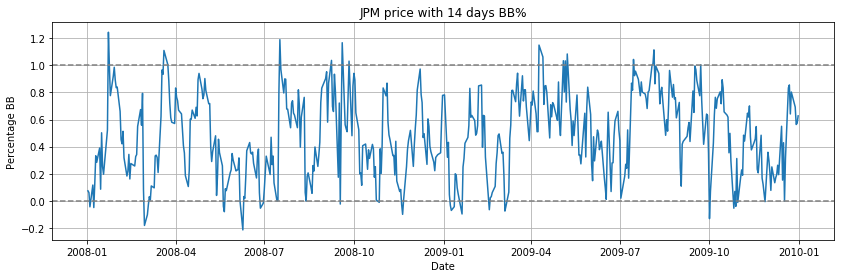

In [194]:
fig, ax = plt.subplots()
ax.plot(bbp)
ax.set_title("JPM price with {} days BB%".format(window))
ax.set_xlabel("Date")
ax.set_ylabel("Percentage BB")
ax.axhline(0.0, linestyle='--', linewidth = 1.5, color ='grey')
ax.axhline(1.0, linestyle='--', linewidth = 1.5, color ='grey')
ax.grid(True)
fig.set_figwidth(14)


In [196]:
price_sma = df_price['JPM']/rolling_mean 

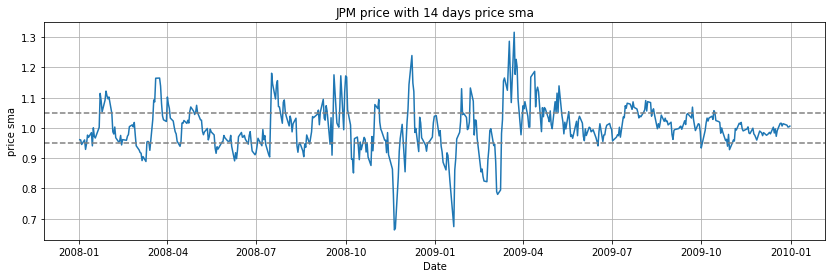

In [199]:
indicator = "price sma"
fig, ax = plt.subplots()
ax.plot(price_sma)
ax.set_title("JPM price with {} days price sma".format(window))
ax.set_xlabel("Date")
ax.set_ylabel("{}".format(indicator))
ax.axhline(1.05, linestyle='--', linewidth = 1.5, color ='grey')
ax.axhline(0.95, linestyle='--', linewidth = 1.5, color ='grey')
ax.grid(True)
fig.set_figwidth(14)

In [ ]:
## RSI

In [228]:
moves = df_price_full.diff()
up = []
down = []

for i in range(len(moves)): 
    if moves[i] < 0: 
        up.append(0)
        down.append(moves[i])
    else: 
        up.append(moves[i])
        down.append(0)
up_series = pd.Series(up)
down_series = pd.Series(down).abs()
# up_ema = up_series.ewm(alpha=1/lookback, min_periods=lookback).mean()
# down_ema = down_series.ewm(alpha=1/lookback, min_periods=lookback).mean()

up_sma= up_series.rolling(window=lookback, min_periods=lookback).mean()
down_sma = down_series.rolling(window=lookback, min_periods=lookback).mean()

# rs = up_ema/down_ema 
rs = up_sma/down_sma
rsi = 100 - (100/(1 + rs))
rsi_df = pd.DataFrame(rsi).rename(columns = {0:"rsi"}).set_index(df_price_full.index)
rsi_df = rsi_df[sd:]

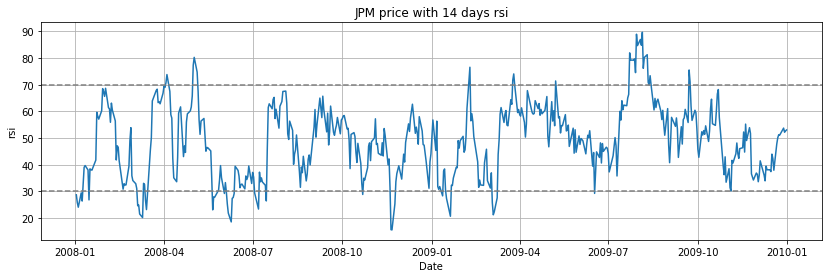

In [229]:
indicator = "rsi"
fig, ax = plt.subplots()
ax.plot(rsi_df)
ax.set_title("JPM price with {} days rsi".format(window))
ax.set_xlabel("Date")
ax.set_ylabel("{}".format(indicator))
ax.axhline(30, linestyle='--', linewidth = 1.5, color ='grey')
ax.axhline(70, linestyle='--', linewidth = 1.5, color ='grey')
ax.grid(True)
fig.set_figwidth(14)

In [239]:
## stochastic oscillator 
# Date,Open,High,Low,Close,Volume,Adj Close


In [241]:
df_high = get_data(symbols=['JPM'],dates = pd.date_range(extend_sd, ed), addSPY=True, colname='High')[['JPM']]
df_low = get_data(symbols=['JPM'],dates = pd.date_range(extend_sd, ed), addSPY=True, colname='Low')[['JPM']]
df_close = get_data(symbols=['JPM'],dates = pd.date_range(extend_sd, ed), addSPY=True, colname='Close')[['JPM']]
df_vol = get_data(symbols=['JPM'],dates = pd.date_range(extend_sd, ed), addSPY=True, colname='Volume')[['JPM']]

In [242]:
df_low.head()

,JPM
2007-12-12,45.18
2007-12-13,44.73
2007-12-14,44.68
2007-12-17,44.36
2007-12-18,43.13


In [249]:
high_roll = df_high['JPM'].rolling(lookback).max()
low_roll = df_low['JPM'].rolling(lookback).min()

num = df_close['JPM'] - low_roll
den = high_roll - low_roll
per_k = (num/den) * 100 
per_d = per_k.rolling(3).mean()

per_k = pd.DataFrame(per_k).set_index(df_high.index)
per_d =  pd.DataFrame(per_k).set_index(df_high.index)

per_k = per_k[sd:]
per_d = per_d[sd:]


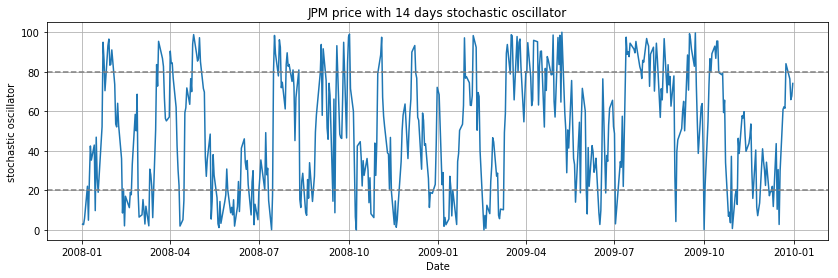

In [253]:
indicator = "stochastic oscillator"
fig, ax = plt.subplots()
ax.plot(per_k)
ax.set_title("JPM price with {} days stochastic oscillator".format(window))
ax.set_xlabel("Date")
ax.set_ylabel("{}".format(indicator))
ax.axhline(20, linestyle='--', linewidth = 1.5, color ='grey')
ax.axhline(80, linestyle='--', linewidth = 1.5, color ='grey')
ax.grid(True)
fig.set_figwidth(14)

In [254]:
clv = df_vol['JPM'] * ( 2 * df_close['JPM'] - df_high['JPM'] - df_low['JPM']) / (df_high['JPM'] - df_low['JPM']) 

In [269]:
chaikin = clv.rolling(lookback).sum() / df_vol['JPM'].rolling(lookback).sum()

In [270]:
chaikin = pd.DataFrame(chaikin).set_index(df_high.index)[sd:]

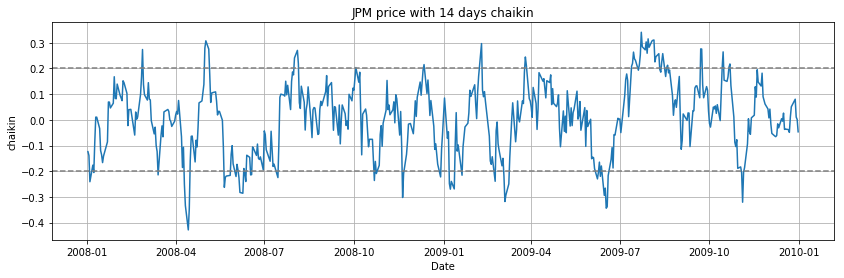

In [271]:
indicator = "chaikin"
fig, ax = plt.subplots()
ax.plot(chaikin)
ax.set_title("JPM price with {} days chaikin".format(window))
ax.set_xlabel("Date")
ax.set_ylabel("{}".format(indicator))
ax.axhline(0.20, linestyle='--', linewidth = 1.5, color ='grey')
ax.axhline(-0.20, linestyle='--', linewidth = 1.5, color ='grey')
ax.grid(True)
fig.set_figwidth(14)

In [16]:
    extend_sd = sd - dt.timedelta(20)
    df_high = get_data(
        symbols=["JPM"], dates=pd.date_range(extend_sd, ed), addSPY=True, colname="High"
    )[["JPM"]]
    df_low = get_data(
        symbols=["JPM"], dates=pd.date_range(extend_sd, ed), addSPY=True, colname="Low"
    )[["JPM"]]
    df_close_adj = get_data(
        symbols=["JPM"],
        dates=pd.date_range(extend_sd, ed),
        addSPY=True,
        colname="Adj Close",
    )[["JPM"]]
    df_vol = get_data(
        symbols=["JPM"],
        dates=pd.date_range(extend_sd, ed),
        addSPY=True,
        colname="Volume",
    )[["JPM"]]

In [19]:
    df_close = get_data(
        symbols=["JPM"],
        dates=pd.date_range(extend_sd, ed),
        addSPY=True,
        colname="Close")[["JPM"]]

In [20]:
df_close.head()

,JPM
2007-12-12,46.15
2007-12-13,45.76
2007-12-14,45.20
2007-12-17,44.53
2007-12-18,43.90


In [21]:
df_close_adj.head()

,JPM
2007-12-12,41.73
2007-12-13,41.38
2007-12-14,40.87
2007-12-17,40.26
2007-12-18,39.70


In [4]:
from indicators import bbp
from TheoreticallyOptimalStrategy import testPolicy
from indicators import bbp, price_sma, rsi, stochastic_osi, chaikin
from util import get_data
import datetime as dt
import pandas as pd

In [7]:
history = dt.timedelta(52)
full_sd = sd - history
df_price_full = get_data([symbol], pd.date_range(full_sd, ed))
df_price_full = df_price_full[["JPM"]]

In [8]:
symbol = "JPM"
sd = dt.datetime(2008, 1, 1)
ed = dt.datetime(2009, 12, 31)
sv = 100000

/Users/Ally.Zhang/Documents/VS Code/.venv/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


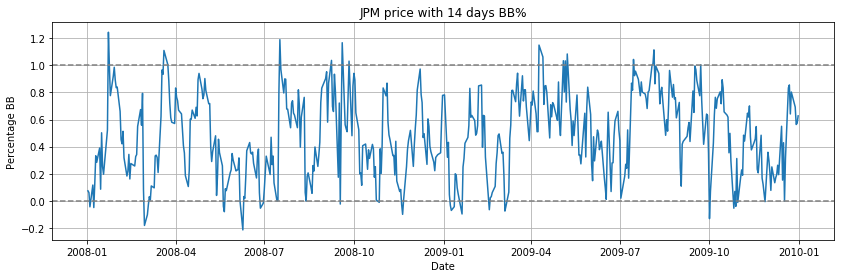

In [9]:
bbp_series = bbp(sd, ed, 14, df_price_full)

In [12]:
df_price_full.diff()['JPM'][1]

2.3999999999999986

In [114]:
rolling_mean = df_price_full.rolling(window=14, min_periods=14).mean()

In [120]:
df_price_full[sd:]["JPM"]  - rolling_mean.loc[sd:]['JPM']

2008-01-02   -1.564286
2008-01-03   -1.582143
2008-01-04   -2.162857
2008-01-07   -1.557143
2008-01-08   -2.767857
2008-01-09   -2.045000
2008-01-10   -0.917143
2008-01-11   -1.210714
2008-01-14   -0.596429
2008-01-15   -2.252857
2008-01-16    0.010714
2008-01-17   -1.049286
2008-01-18   -1.244286
2008-01-22    0.072857
2008-01-23    4.272143
2008-01-24    3.381429
2008-01-25    2.004286
2008-01-28    3.488571
2008-01-29    4.693571
2008-01-30    4.141429
2008-01-31    3.795714
2008-02-01    4.084286
2008-02-04    1.917857
2008-02-05   -0.519286
2008-02-06   -0.818571
2008-02-07    0.120714
2008-02-08   -1.335000
2008-02-11   -1.927143
2008-02-12   -1.800714
2008-02-13   -1.025000
                ...   
2009-11-18    0.142857
2009-11-19   -0.700000
2009-11-20   -0.781429
2009-11-23   -0.040714
2009-11-24   -0.819286
2009-11-25   -1.002857
2009-11-27   -1.647143
2009-11-30   -0.420714
2009-12-01   -0.547857
2009-12-02   -0.655000
2009-12-03   -1.035714
2009-12-04   -0.627143
2009-12-07 

2008-01-02    40.034286
2008-01-03    39.782143
2008-01-04    39.492857
2008-01-07    39.267143
2008-01-08    38.977857
2008-01-09    38.765000
2008-01-10    38.617143
2008-01-11    38.480714
2008-01-14    38.326429
2008-01-15    37.982857
2008-01-16    37.779286
2008-01-17    37.569286
2008-01-18    37.354286
2008-01-22    37.197143
2008-01-23    37.427857
2008-01-24    37.628571
2008-01-25    37.805714
2008-01-28    38.081429
2008-01-29    38.586429
2008-01-30    39.048571
2008-01-31    39.444286
2008-02-01    39.925714
2008-02-04    40.242143
2008-02-05    40.549286
2008-02-06    40.698571
2008-02-07    41.029286
2008-02-08    41.305000
2008-02-11    41.467143
2008-02-12    41.310714
2008-02-13    41.255000
                ...    
2009-11-18    41.187143
2009-11-19    41.240000
2009-11-20    41.231429
2009-11-23    41.270714
2009-11-24    41.289286
2009-11-25    41.172857
2009-11-27    41.027143
2009-11-30    40.900714
2009-12-01    40.767857
2009-12-02    40.605000
2009-12-03    40